In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import iqr

# Cargar la data
Con pandas carga los datos de el archivo csv *Data_CHF_Zhao_2020_ATE.csv*

In [17]:
data_chf = pd.read_csv('Data_CHF_Zhao_2020_ATE.csv')

In [19]:
data_chf.describe()

,id,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000
mean,933.000000,10.010949,2862.647721,0.016179,9.417212,16.167721,911.340483,3.854638
std,538.523444,4.282715,1656.412247,0.117575,6.333807,21.182870,726.718974,1.985535
min,1.000000,0.100000,0.000000,-0.866700,1.000000,1.000000,10.000000,0.800000
25%,467.000000,6.890000,1519.000000,-0.048300,5.600000,5.600000,432.000000,2.400000
50%,933.000000,10.340000,2590.000000,0.024400,8.500000,10.300000,625.000000,3.500000
75%,1399.000000,13.790000,3933.000000,0.100600,11.100000,15.200000,1778.000000,4.800000
max,1865.000000,20.680000,7975.000000,0.232000,37.500000,120.000000,3048.000000,19.300000


Creamos una lista con las variables numericas

In [21]:
numerical_cols = [
    'pressure [MPa]', 'mass_flux [kg/m2-s]', 'x_e_out [-]',
    'D_e [mm]', 'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]'
]

# Analizando los datos númericos

Para realizar un análisis de incertidumbre en los datos, es fundamental calcular y entender diversas medidas de dispersión y error. A continuación, se describen las medidas de dispersión y error utilizadas para evaluar la variabilidad y la precisión de los datos.


## Medidas de Disperción
### Media: 
Representa el valor promedio de los datos y se calcula sumando todos los valores y dividiéndolos por el número total de observaciones. La media es útil para obtener una visión general de la magnitud típica de los valores en un conjunto de datos.

### Desviación Estándar
Mide la variabilidad o dispersión de los datos alrededor de la media. Es crucial para evaluar la variabilidad de los datos.

### SEM (Error Estándar de la Media)
El Error Estándar de la Media (SEM) es una medida que describe cuán precisamente la media de una muestra representa la media de la población general. 
El SEM se calcula dividiendo la desviación estándar de la muestra por la raíz cuadrada del número de observaciones en la muestra.
$$
SEM = \frac{\sigma}{\sqrt{n}}
$$

### SEM % of Mean (Error Estándar de la Media como Porcentaje de la Media)
El SEM % of Mean también expresa el SEM como un porcentaje de la media.Este valor proporciona una medida de cuán significativa es la incertidumbre alrededor de la media en términos relativos al tamaño de la media misma. Es útil para comparar la precisión de las medias entre diferentes conjuntos de datos donde las escalas de medición pueden diferir.

$$
\text{SEM \% of Mean} = \frac{SEM}{\mu} \times 100
$$


###  Rango Intercuartílico (IQR) 
El IQR es una medida de dispersión estadística que se utiliza para describir la variabilidad de los datos al concentrarse en la parte central de una distribución. El IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de los datos. Estos cuartiles dividen el conjunto de datos en cuatro partes iguales.
$$
\text{IQR} = Q3 - Q1
$$


Calcular para la lista de variables numericas:
- Media
- desviación estándar
- SEM (Error Estándar de la Media)
- Error Estándar de la Media como Porcentaje de la Media
- IQR


Debemos almacenar los resultados en un data frame de pandas, el data fame lo debemos crear a partir de un diccionario.

El resultado debe ser el siguiente

| Variable     | Mean       | Standard Deviation | SEM       | SEM % of Mean | IQR    |
|--------------|------------|---------------------|-----------|---------------|--------|
| pressure [MPa]| 10.010949  | 4.282715            | 0.099170  | 0.990614      | 6.9000 |
| mass_flux [kg/m²-s] | 2862.647721 | 1656.412247  | 38.355621 | 1.339865      | 2414.0000 |
| x_e_out [-]  | 0.016179   | 0.117575            | 0.002723  | 16.827823     | 0.1489 |
| D_e [mm]     | 9.417212   | 6.333807            | 0.146665  | 1.557410      | 5.5000 |
| D_h [mm]     | 16.167721  | 21.182870           | 0.490507  | 3.033867      | 9.6000 |
| length [mm]  | 911.340483 | 726.718974          | 16.827790 | 1.846488      | 1346.0000 |
| chf_exp [MW/m²] | 3.854638  | 1.985535           | 0.045977  | 1.192764      | 2.4000 |



In [55]:
# Desviación estándar de las columnas numéricas
std_devs = data_chf[numerical_cols].std()

# Medias de las columnas numéricas
means = data_chf[numerical_cols].mean()

# Cantidad de muestras para cada variable
n_samples = data_chf.count()

# Error estándar medio (SEM)
sems = std_devs / np.sqrt(n_samples)

# Porcentaje del error estándar respecto a la media
sem_percentage = ( sems / means )* 100 

# IQR
# utilizar la funcion iqr de scipy.stats
iqr_data = data_chf[numerical_cols].apply(iqr)

# Crear un DataFrame para mostrar los resultados
uncertainty_df = pd.DataFrame({
    'Media': means,
    'Desviación Estándar': std_devs,
    ##'Cantidad de Muestras': n_samples, Este lo voy a dejar como comentario porque no aparece en la tabla que nos debería quedar.
    'SEM': sems,
    'SEM% de la Media': sem_percentage,
    'IQR': iqr_data
})
uncertainty_df = uncertainty_df.reindex(numerical_cols)
uncertainty_df

,Media,Desviación Estándar,SEM,SEM% de la Media,IQR
pressure [MPa],10.010949,4.282715,0.099170,0.990614,6.9000
mass_flux [kg/m2-s],2862.647721,1656.412247,38.355621,1.339865,2414.0000
x_e_out [-],0.016179,0.117575,0.002723,16.827823,0.1489
D_e [mm],9.417212,6.333807,0.146665,1.557410,5.5000
D_h [mm],16.167721,21.182870,0.490507,3.033867,9.6000
length [mm],911.340483,726.718974,16.827790,1.846488,1346.0000
chf_exp [MW/m2],3.854638,1.985535,0.045977,1.192764,2.4000


## Interpretando las medidas de dispersión
Escribe en un celda en markdown la interpretación de los resultados en la tabla de medidas de dispersión

### pressure [MPa]	
La presión promedio es de aproximadamente 10.01 MPa. La desviación estándar es relativamente alta (4.28 MPa), lo que indica que los valores de presión varían considerablemente alrededor de la media. El SEM es pequeño (0.099 MPa), lo que sugiere que la media es una estimación precisa de la media de la población. El SEM% es menor al 1%, lo que confirma que el error en la estimación de la media es muy bajo. El IQR de 6.90 MPa indica que el 50% central de los datos está disperso en un rango de 6.90 MPa.

### mass_flux [kg/m2-s]
El flujo másico promedio es de aproximadamente 2862.65 kg/m²-s. La desviación estándar es alta (1656.41 kg/m²-s), lo que indica una gran variabilidad en los datos. El SEM es 38.36 kg/m²-s, lo que sugiere que la media es una estimación relativamente precisa. El SEM% es del 1.34%, lo que indica que el error en la estimación de la media es bajo. El IQR de 2414.00 kg/m²-s muestra que el 50% central de los datos está muy disperso.

### x_e_out [-]
La media de x_e_out es muy baja (0.016179), lo que sugiere que los valores tienden a estar cerca de cero. La desviación estándar es alta en relación con la media (0.117575), lo que indica una gran variabilidad. El SEM es pequeño (0.002723), pero el SEM% es alto (16.83%), lo que sugiere que la media puede no ser una estimación muy precisa debido a la alta variabilidad. El IQR de 0.1489 indica que el 50% central de los datos está disperso en un rango relativamente amplio.

### D_e [mm]
El D_e [mm] es de aproximadamente 9.42 mm. La desviación estándar es alta (6.33 mm), lo que indica una gran variabilidad en los datos. El SEM es pequeño (0.146 mm), y el SEM% es bajo (1.56%), lo que sugiere que la media es una estimación precisa. El IQR de 5.50 mm indica que el 50% central de los datos está disperso en un rango moderado.

### D_h [mm]
El D_h [mm] promedio es de aproximadamente 16.17 mm. La desviación estándar es muy alta (21.18 mm), lo que indica una gran variabilidad en los datos. El SEM es 0.490 mm, y el SEM% es del 3.03%, lo que sugiere que la media es una estimación relativamente precisa. El IQR de 9.60 mm indica que el 50% central de los datos está disperso en un rango moderado.

### length [mm]
La longitud promedio es de aproximadamente 911.34 mm. La desviación estándar es alta (726.72 mm), lo que indica una gran variabilidad en los datos. El SEM es 16.83 mm, y el SEM% es bajo (1.85%), lo que sugiere que la media es una estimación precisa. El IQR de 1346.00 mm indica que el 50% central de los datos está muy disperso.

### chf_exp [MW/m2]
El chf_exp [MW/m2] promedio es de aproximadamente 3.85 MW/m². La desviación estándar es moderada (1.99 MW/m²), lo que indica una variabilidad moderada en los datos. El SEM es pequeño (0.046 MW/m²), y el SEM% es bajo (1.19%), lo que sugiere que la media es una estimación precisa. El IQR de 2.40 MW/m² indica que el 50% central de los datos está disperso en un rango moderado.

### Resumen
- En general, el SEM% es bajo para la mayoría de las variables, lo que indica que las medias son estimaciones precisas de las medias poblacionales.

- Variables con alta variabilidad: mass_flux, x_e_out, D_h, y length tienen desviaciones estándar altas en relación con sus medias, lo que indica una gran dispersión de los datos.

- Variables con baja variabilidad: pressure, D_e, y chf_exp tienen desviaciones estándar más bajas en relación con sus medias, lo que sugiere que los datos están más concentrados alrededor de la media.

## Graficando la data

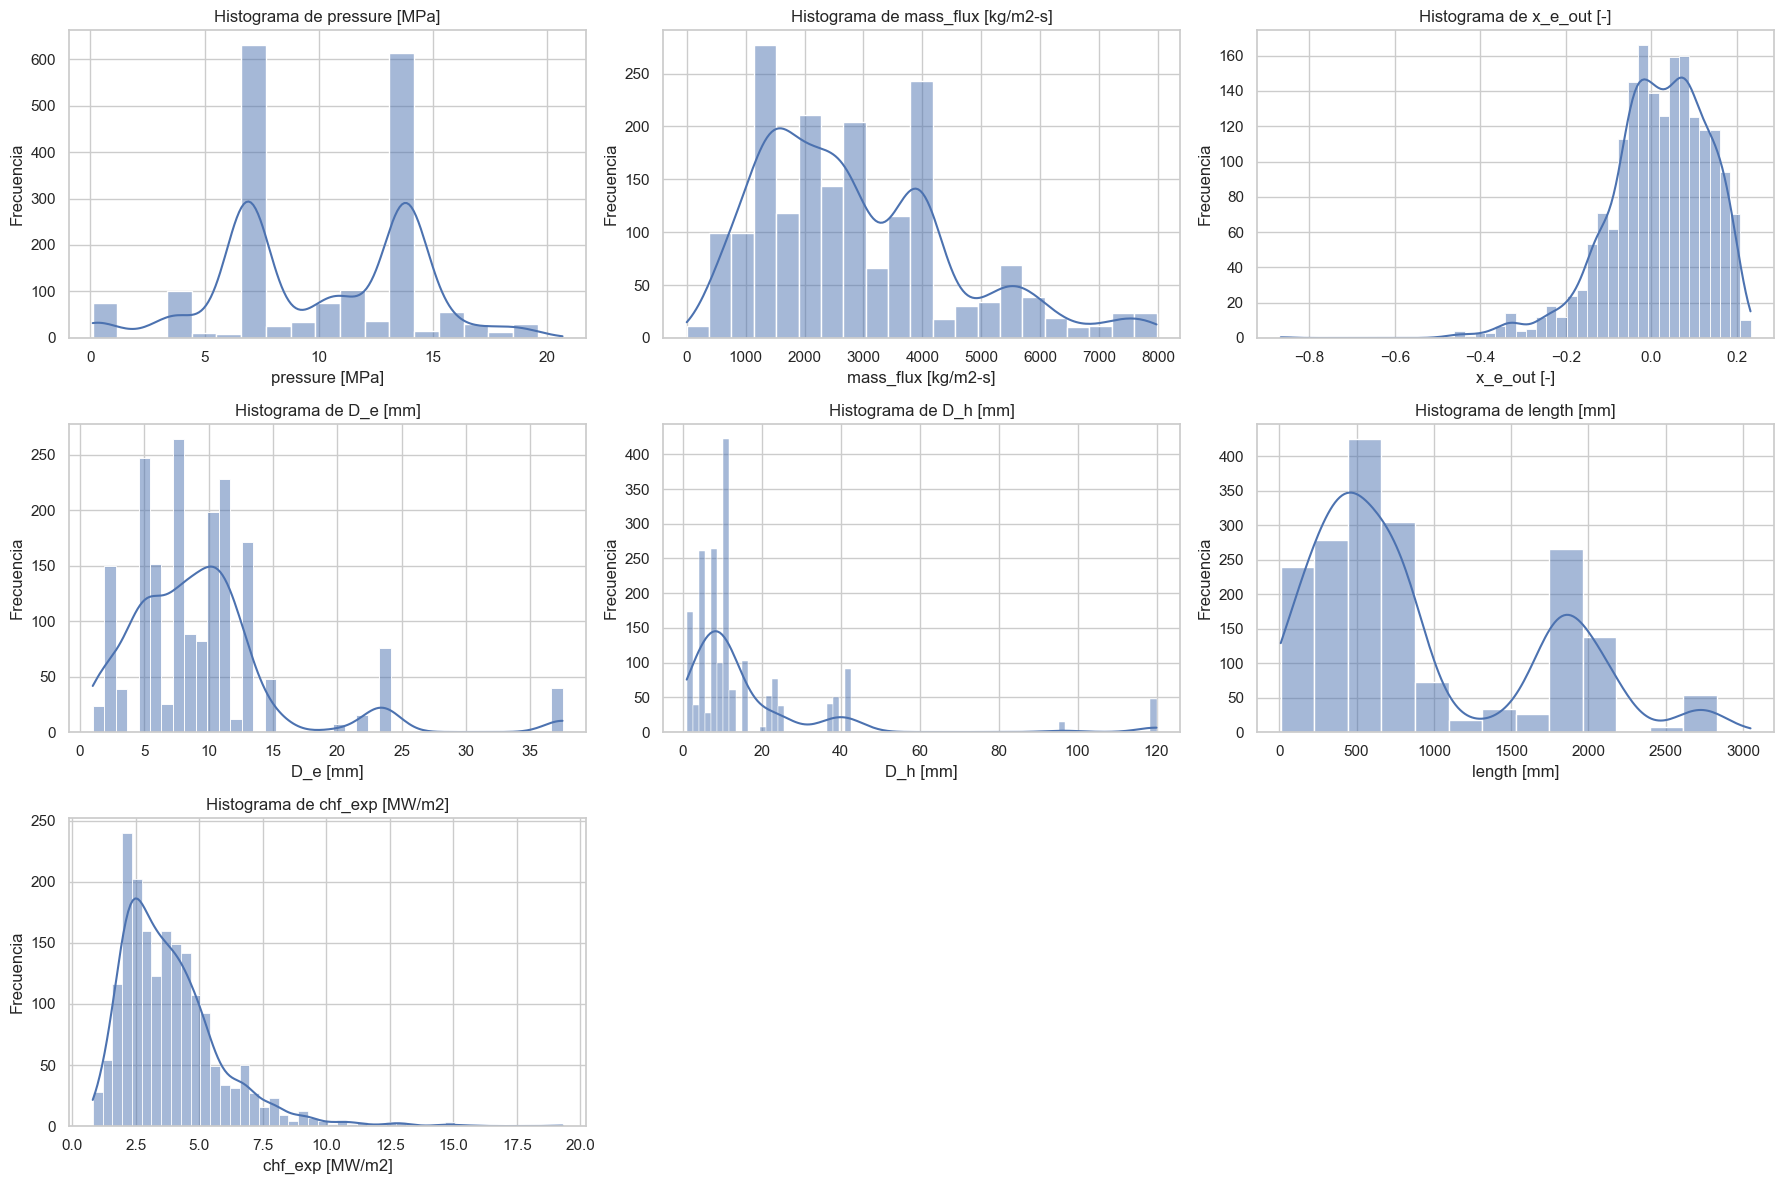

In [53]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten() 

# Plotting histograms for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(data_chf[col], kde=True, ax=axes[i])  # Histograma con curva KDE
    axes[i].set_title(f'Histograma de {col}')  # Título del subplot
    axes[i].set_xlabel(col)  # Etiqueta del eje X
    axes[i].set_ylabel('Frecuencia')  # Etiqueta del eje Y

for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()